In [29]:
import numpy as np
import os
from ctapipe.image import hillas_parameters, hillas_parameters_2, tailcuts_clean
from ctapipe.io import event_source
from ctapipe.calib import CameraCalibrator
from astropy.table import vstack, Table
from astropy.io import fits
import argparse
import h5py
from ctapipe.utils import get_dataset
import copy
import sklearn
import matplotlib.pyplot as plt

In [2]:
filename = get_dataset('gamma_test.simtel.gz')

In [3]:
source = event_source(filename)
source.max_events = 10

In [5]:
events = [copy.deepcopy(event) for event in source]

In [11]:
event = events[1]
tel_id = list(event.r0.tels_with_data)[0]

In [8]:
cal = CameraCalibrator(None, None, r1_product='HESSIOR1Calibrator', extractor_product='LocalPeakIntegrator')

In [9]:
cal.calibrate(event)

In [15]:
data = event.r0.tel[tel_id].waveform
ped = event.mc.tel[tel_id].pedestal
# the pedestal is the average (for pedestal events) of the *sum* of all samples, from sim_telarray

nsamples = data.shape[2]  # total number of samples
pedcorrectedsamples = data - np.atleast_3d(ped)/nsamples    # Subtract pedestal baseline. atleast_3d converts 2D to 3D matrix


In [43]:
pedcorrectedsamples.shape

(1, 1855, 30)

In [45]:
time_serie = pedcorrectedsamples[0,0,:]

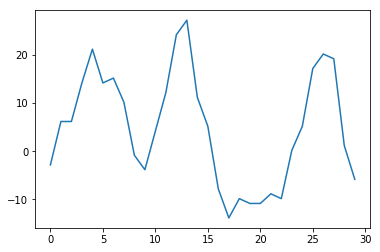

In [48]:
plt.plot(time_serie)

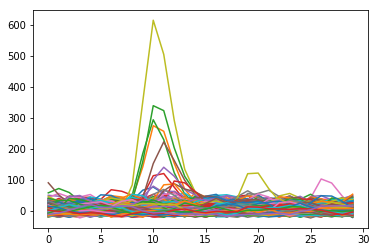

In [44]:
for i in range(pedcorrectedsamples.shape[1]):
    plt.plot(pedcorrectedsamples[0][i,:]);

In [ ]:
x = np.linspace(xmin, xmax, nbx)

fig = plt.figure() # initialise la figure
line, = plt.plot([],[]) 
plt.xlim(xmin, xmax)
plt.ylim(-1,1)

def init():
    line.set_data([],[])
    return line,

def animate(i): 
    t = i * dt
    y = np.cos(k*x - w*t)
    line.set_data(x, y)
    return line,
 
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=100, blit=True, interval=20, repeat=False)

plt.show()

In [26]:
image = event.dl1.tel[tel_id].image[0]

In [18]:
from sklearn.cluster import KMeans

In [19]:
estimator = KMeans()